SEASONALITY ANALYSIS

----------------------------------------
Analyzing seasonality for: SWITCH Enterprise High
Seasonal Strength for SWITCH Enterprise High: 0.3769
Quarterly Seasonal Indices:
  Q1: -1032.8094
  Q2: 119.9719
  Q3: -453.6281
  Q4: 1366.4656

----------------------------------------
Analyzing seasonality for: SWITCH Enterprise Ultra High
Seasonal Strength for SWITCH Enterprise Ultra High: 0.3198
Quarterly Seasonal Indices:
  Q1: -692.1312
  Q2: 692.1313
  Q3: -692.1312
  Q4: 692.1313

----------------------------------------
Analyzing seasonality for: SWITCH Enterprise Ultra High
Seasonal Strength for SWITCH Enterprise Ultra High: 0.3198
Quarterly Seasonal Indices:
  Q1: -692.1312
  Q2: 692.1313
  Q3: -692.1312
  Q4: 692.1313

----------------------------------------
Analyzing seasonality for: SWITCH Enterprise Low
Seasonal Strength for SWITCH Enterprise Low: 0.2075
Quarterly Seasonal Indices:
  Q1: 4472.8281
  Q2: -1583.7969
  Q3: 234.2656
  Q4: -3123.2969

-----------

ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 12 must be < 10.

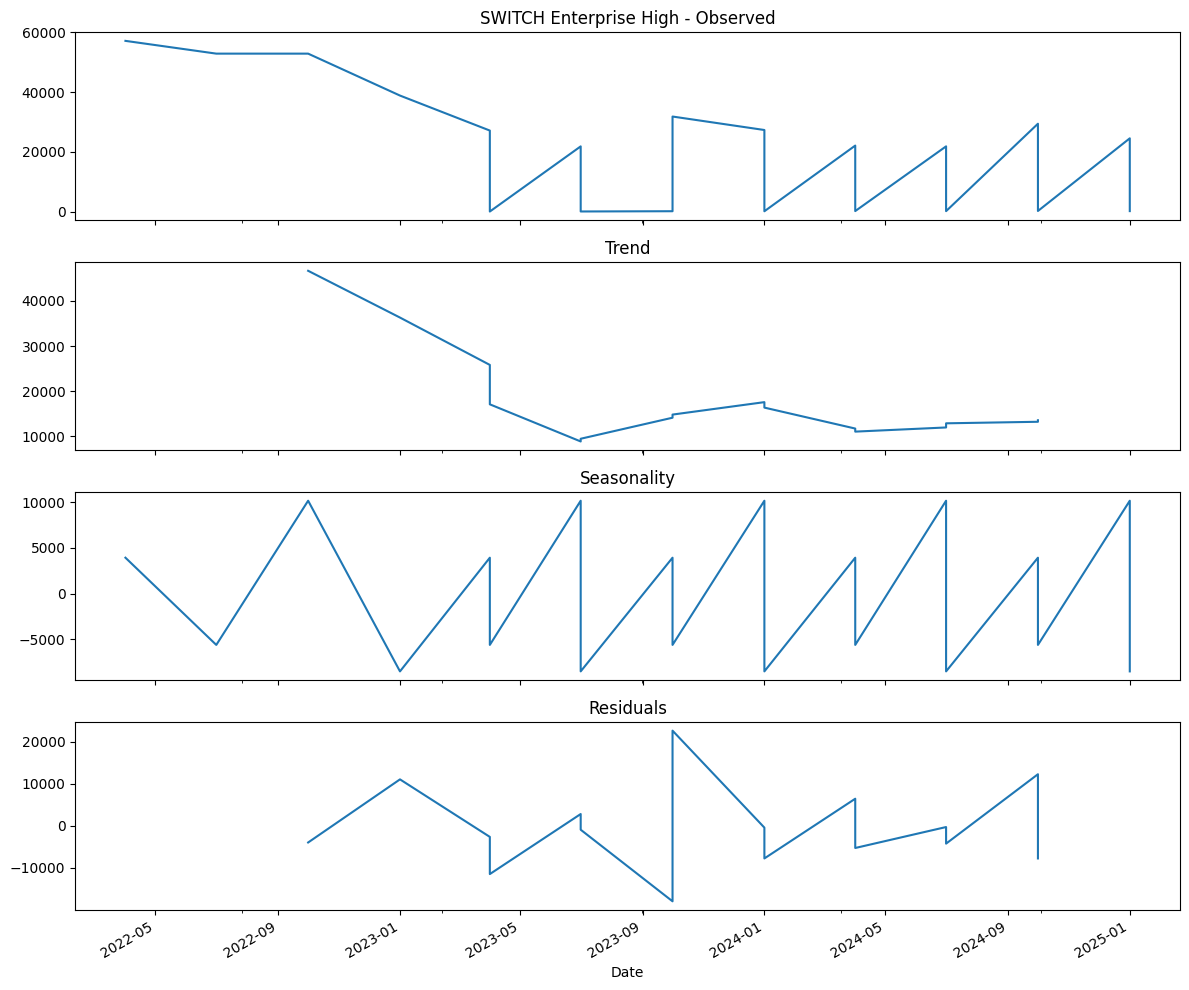

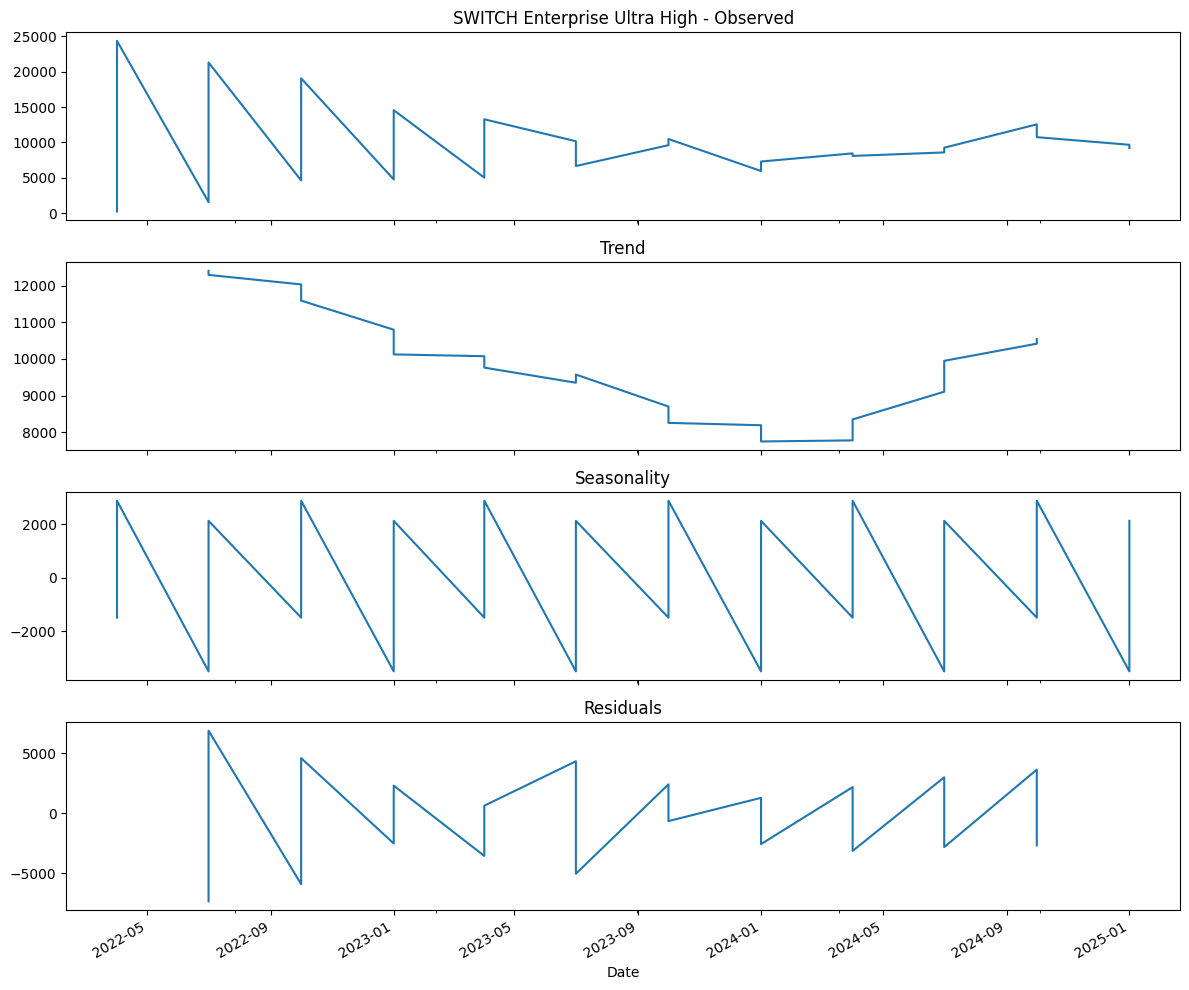

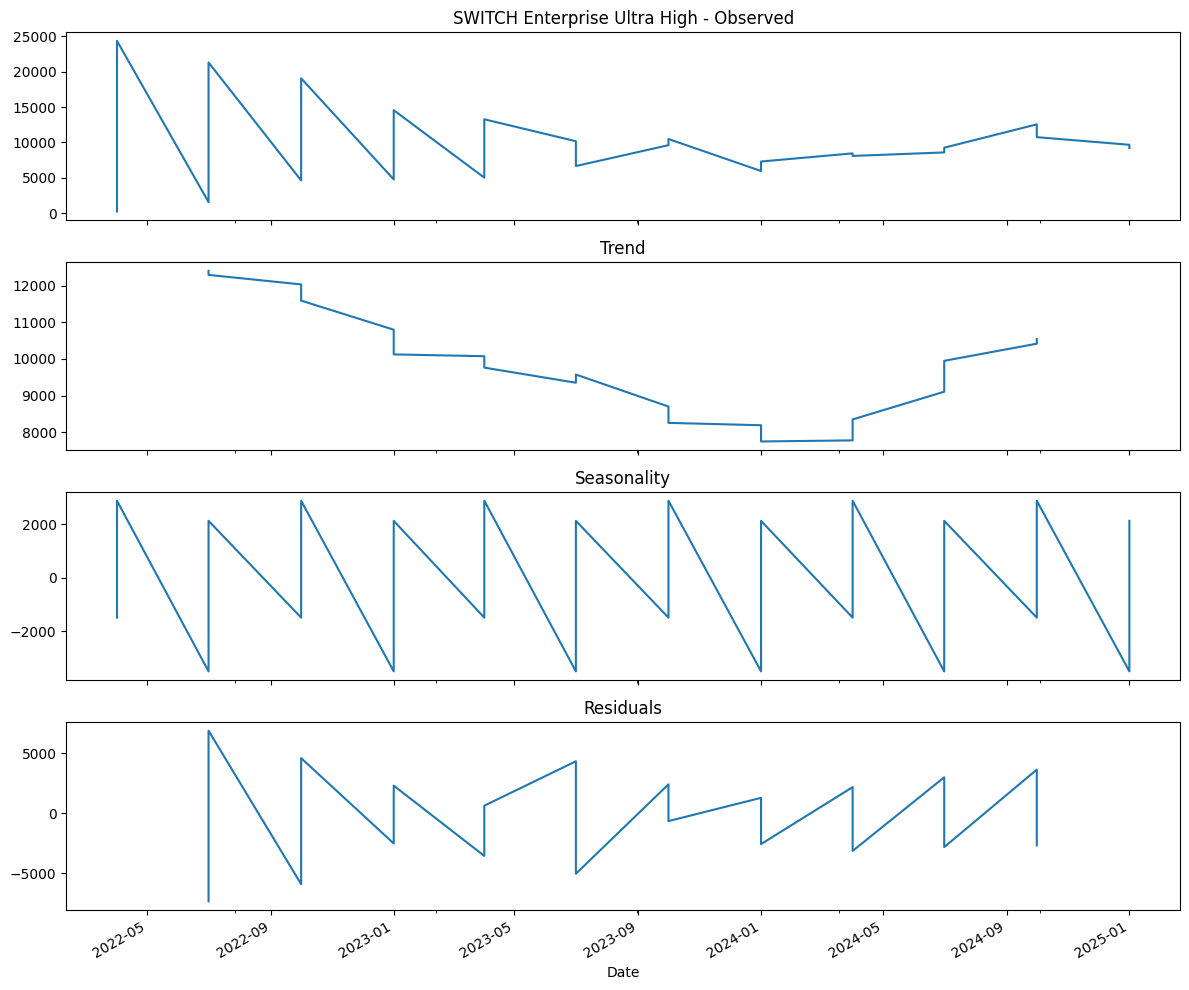

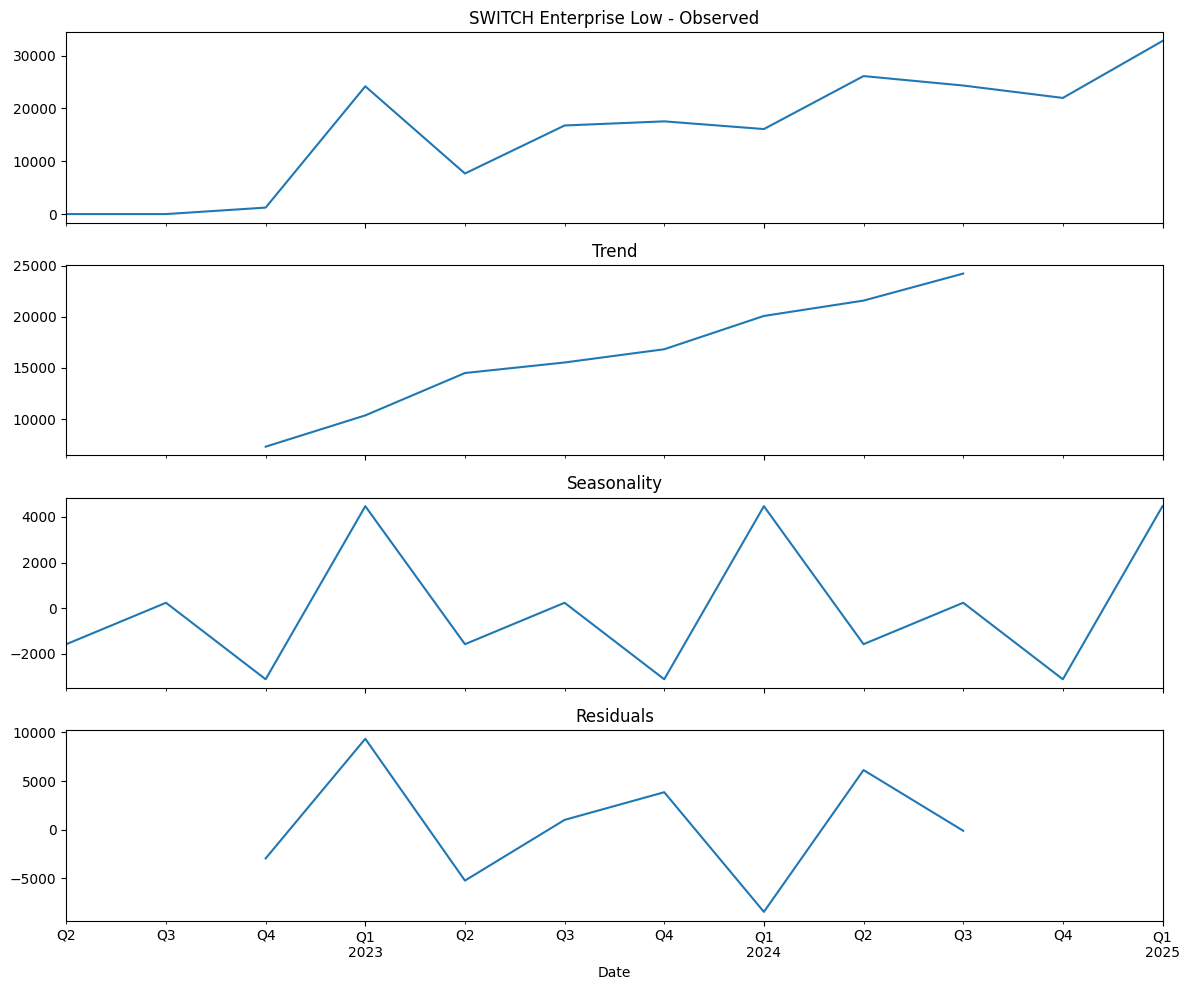

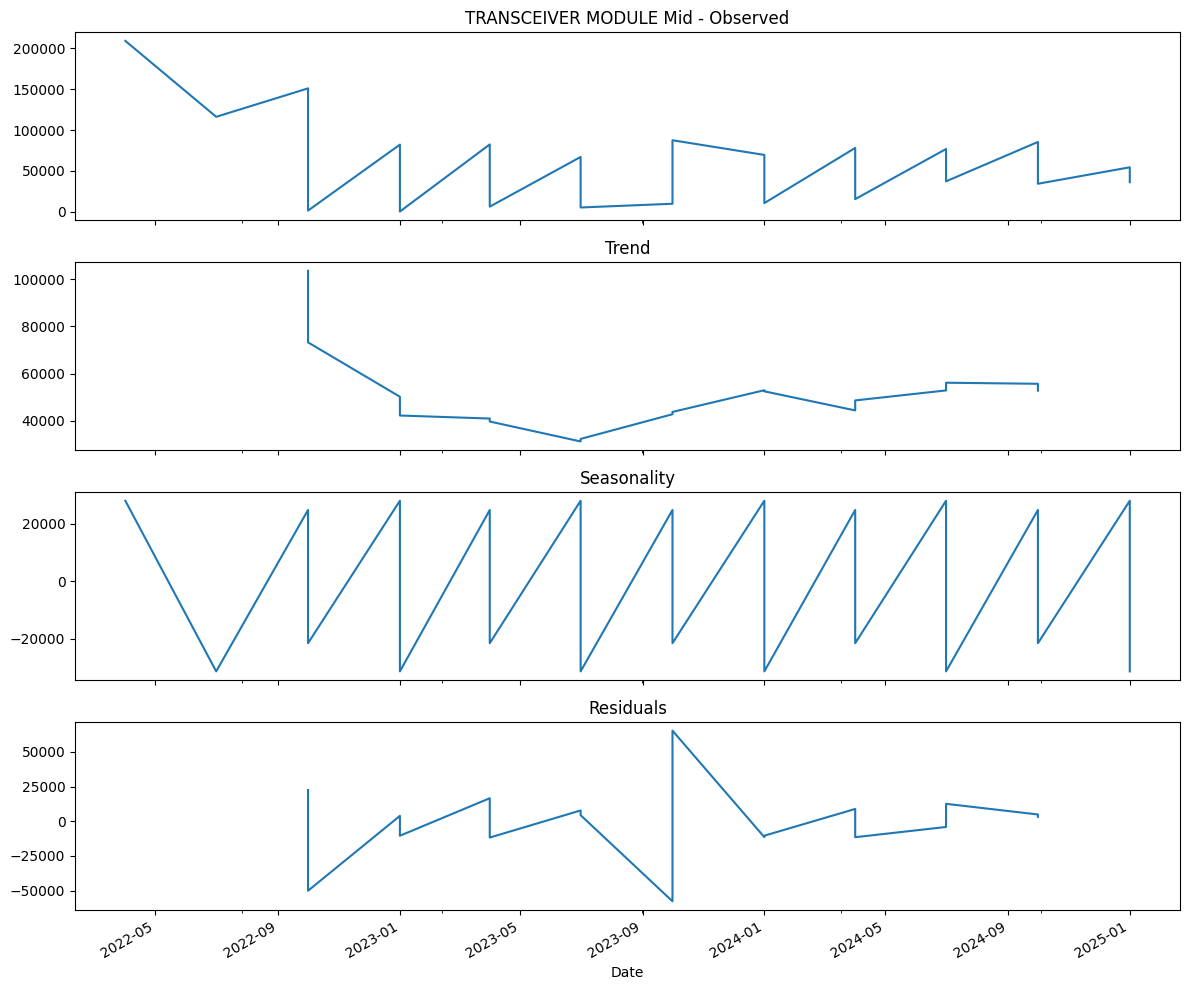

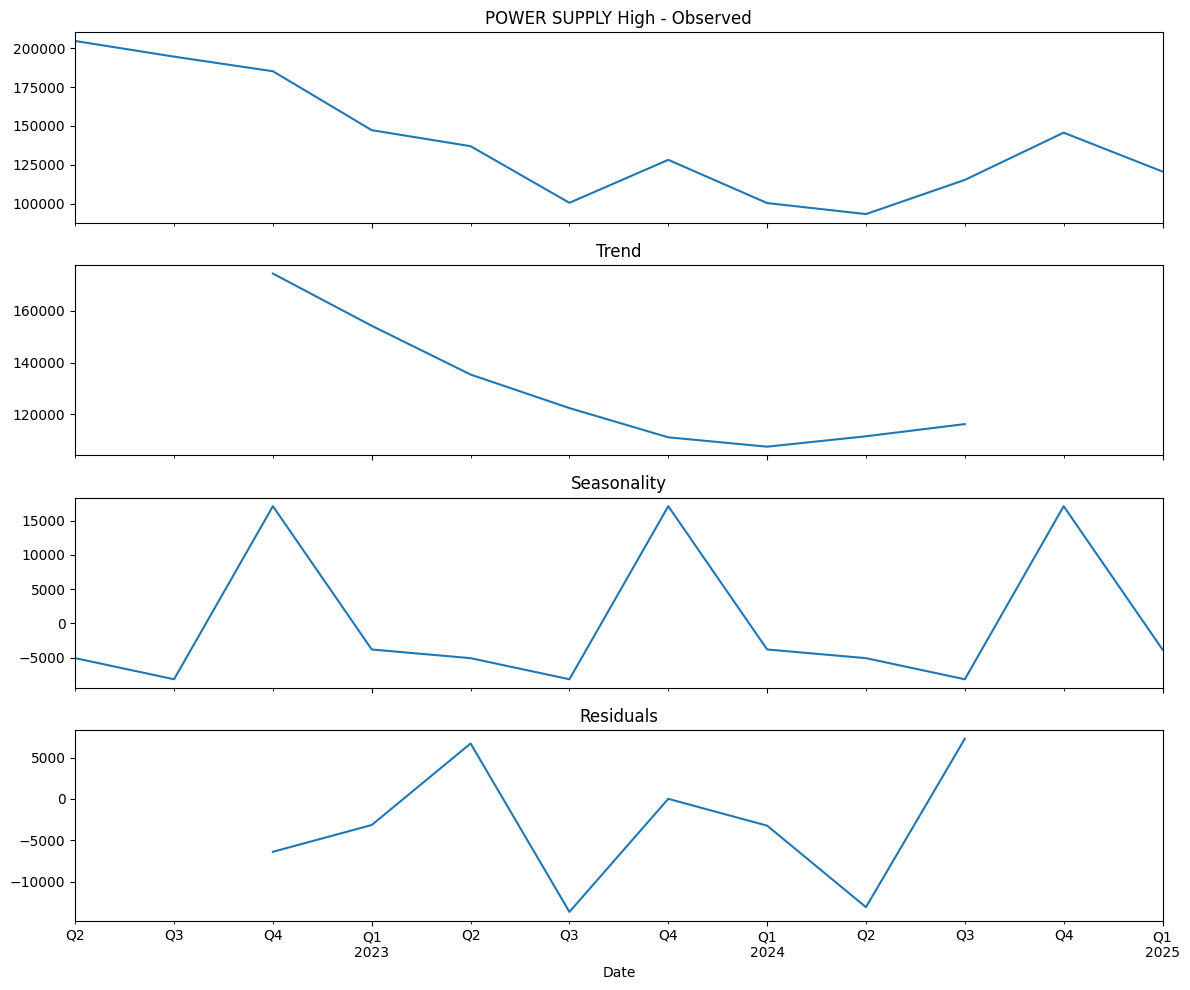

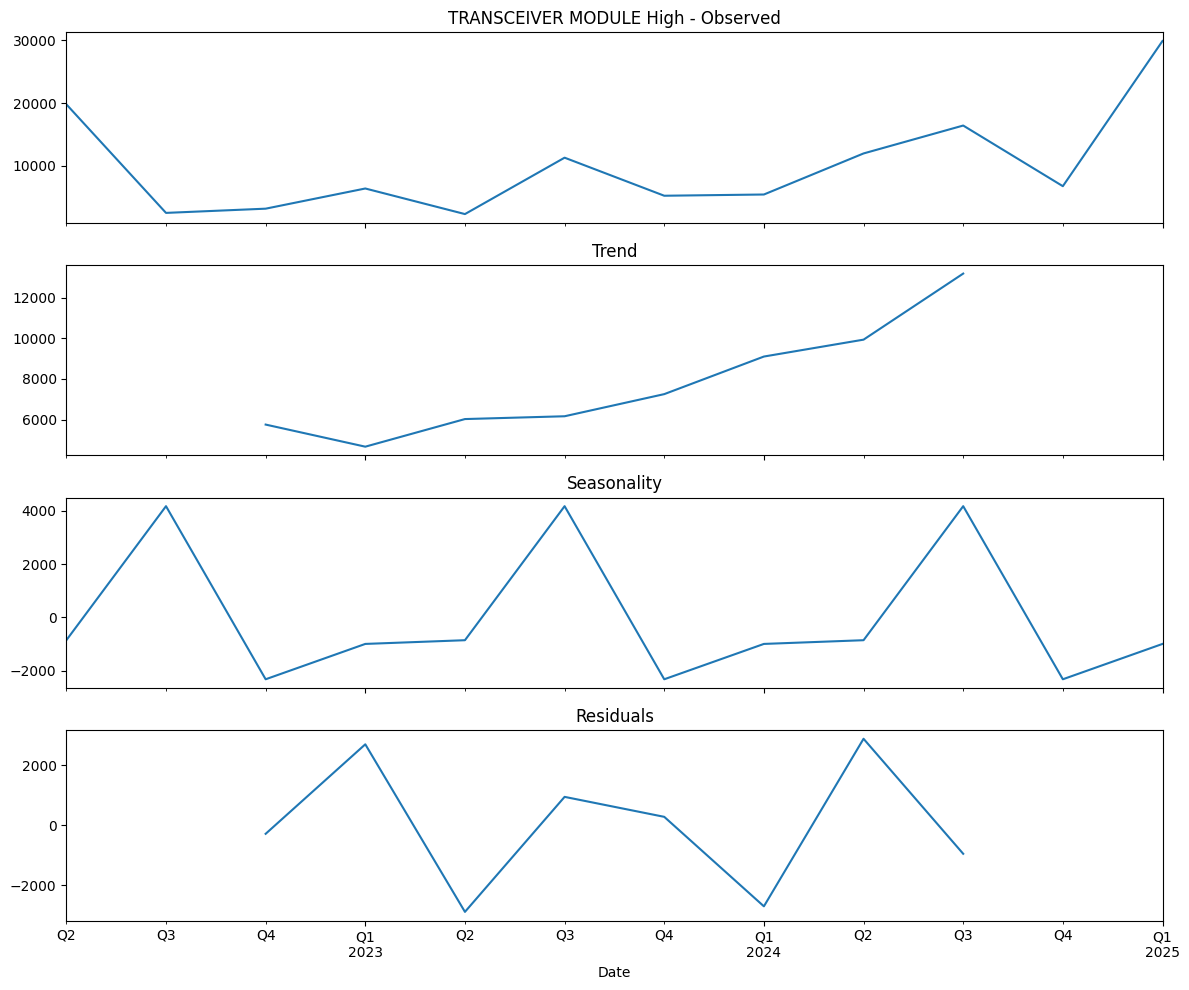

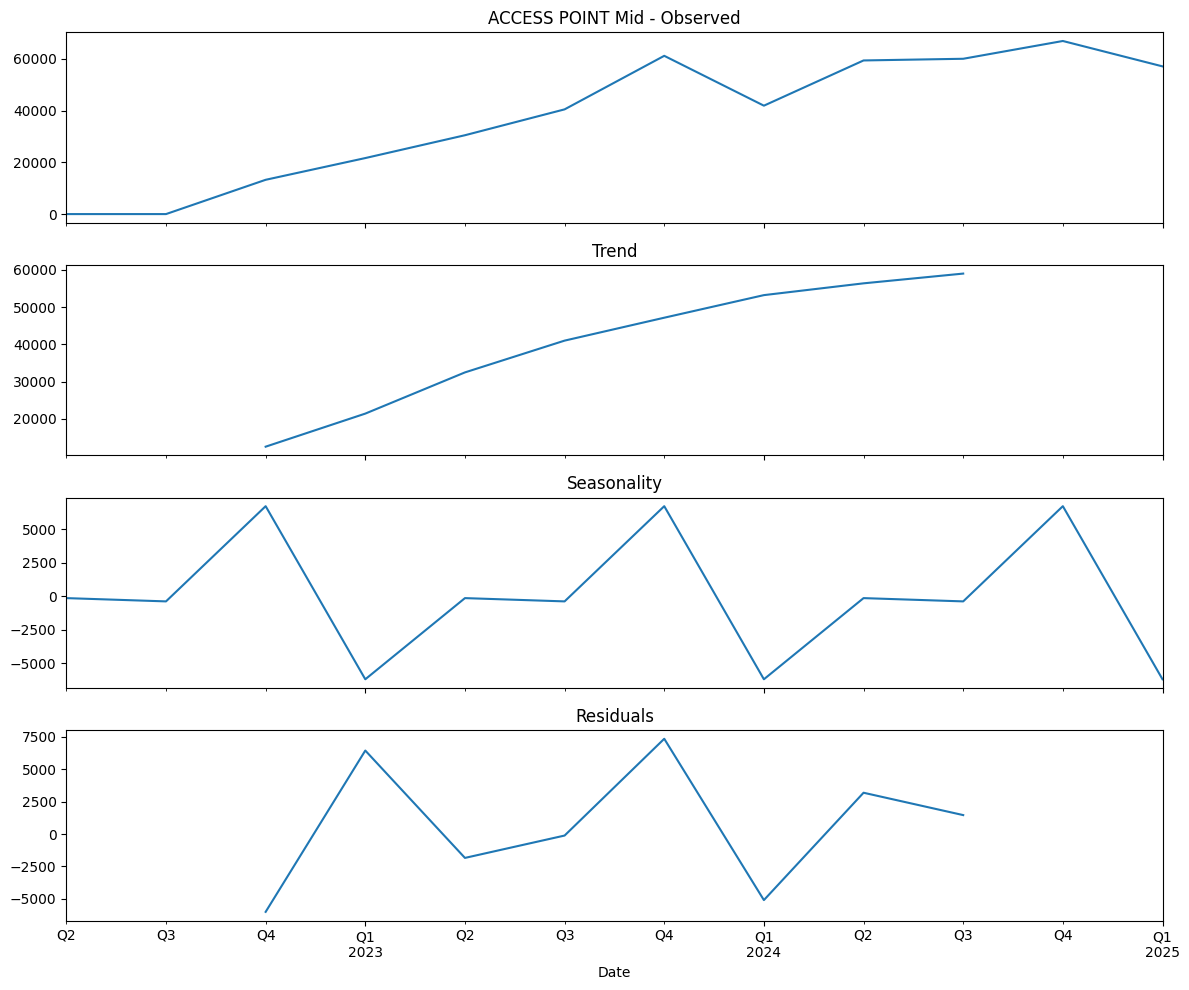

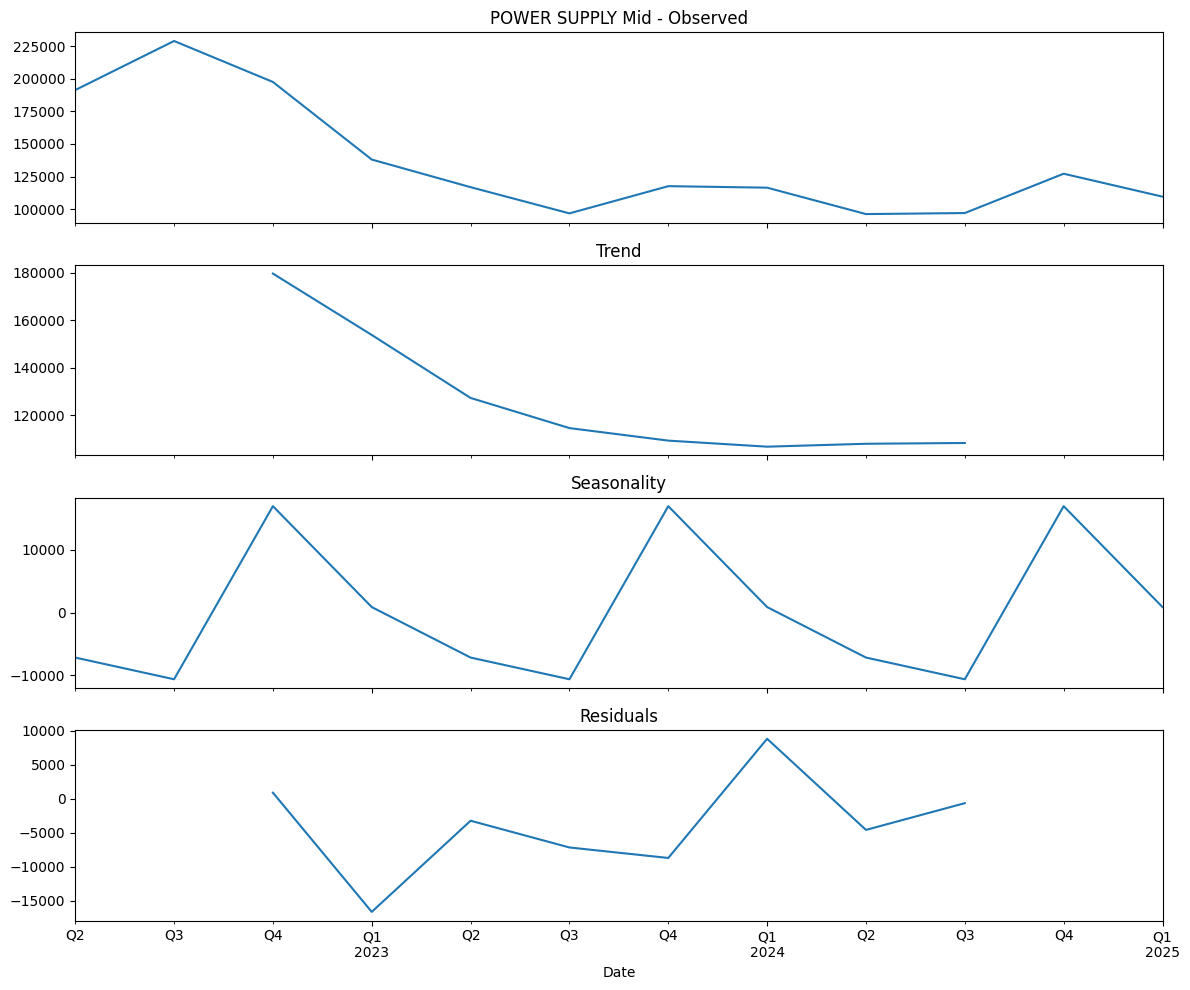

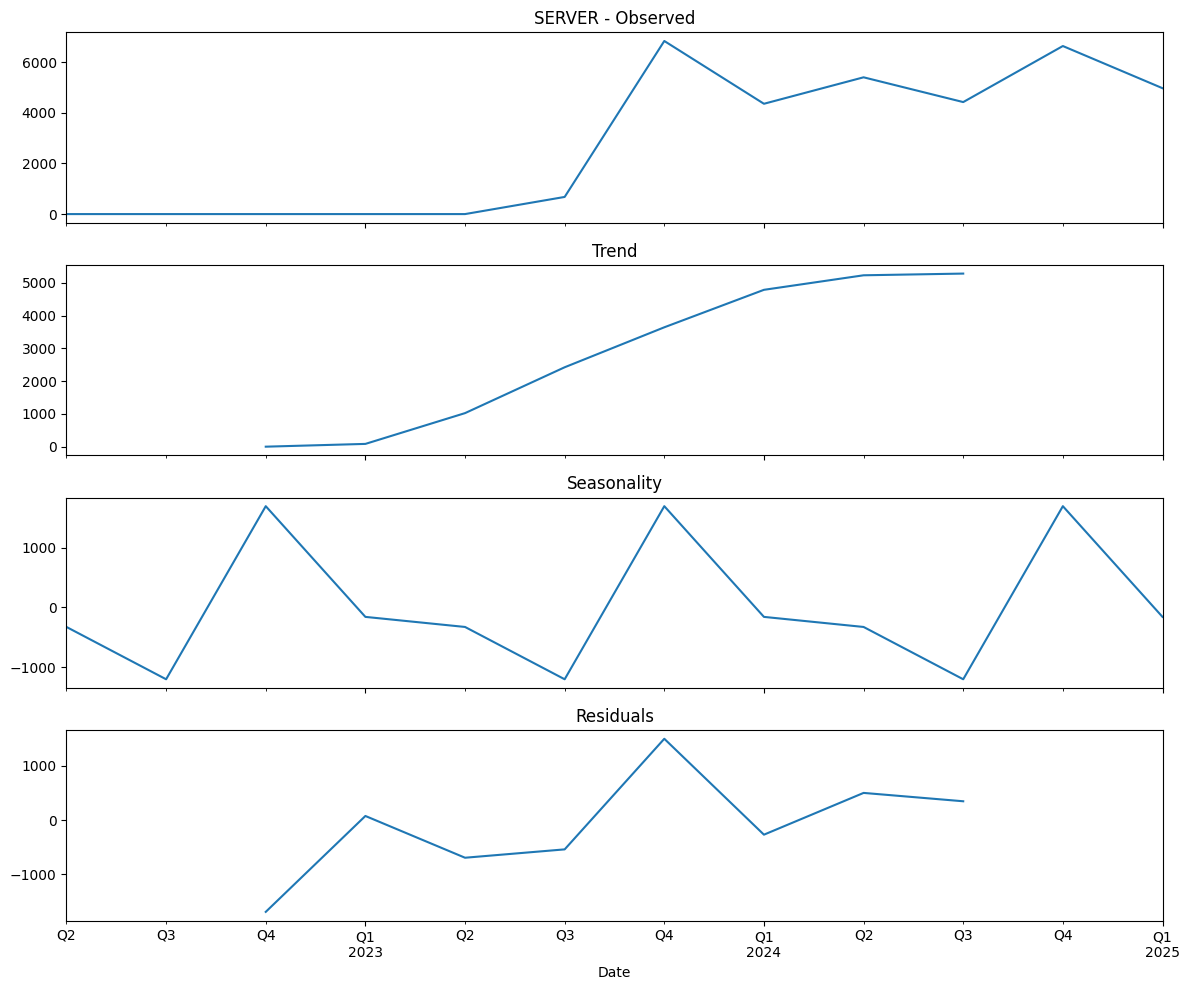

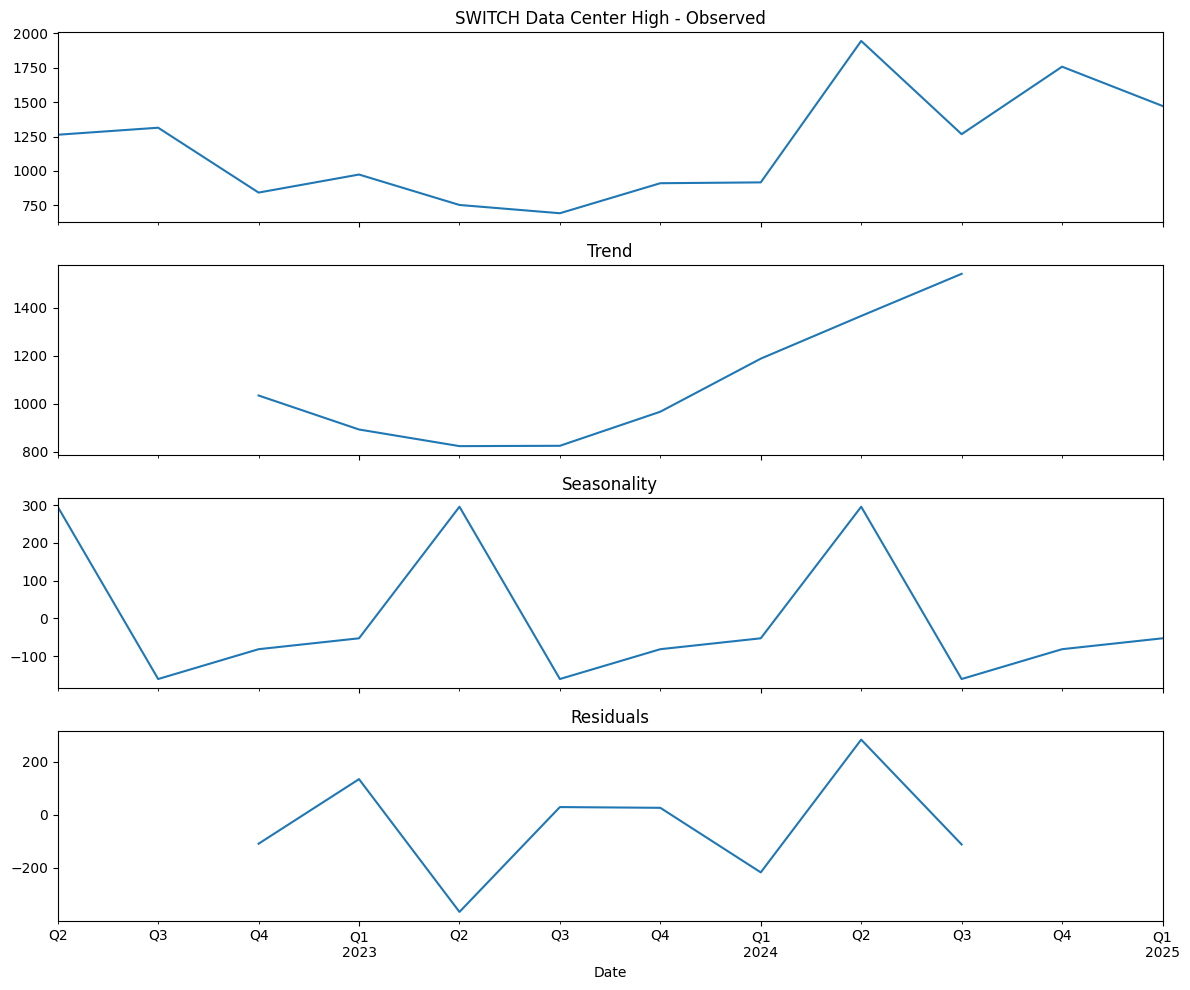

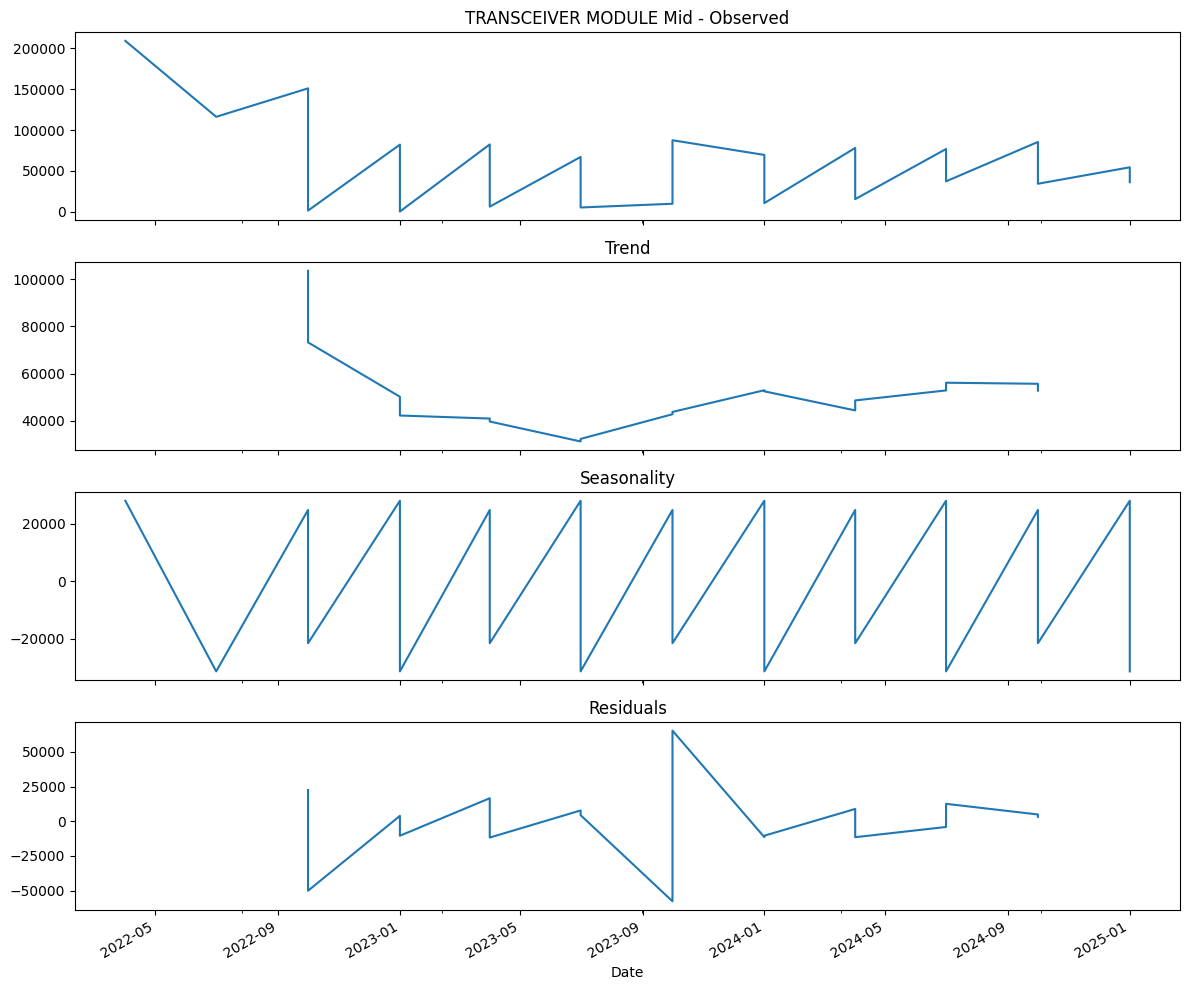

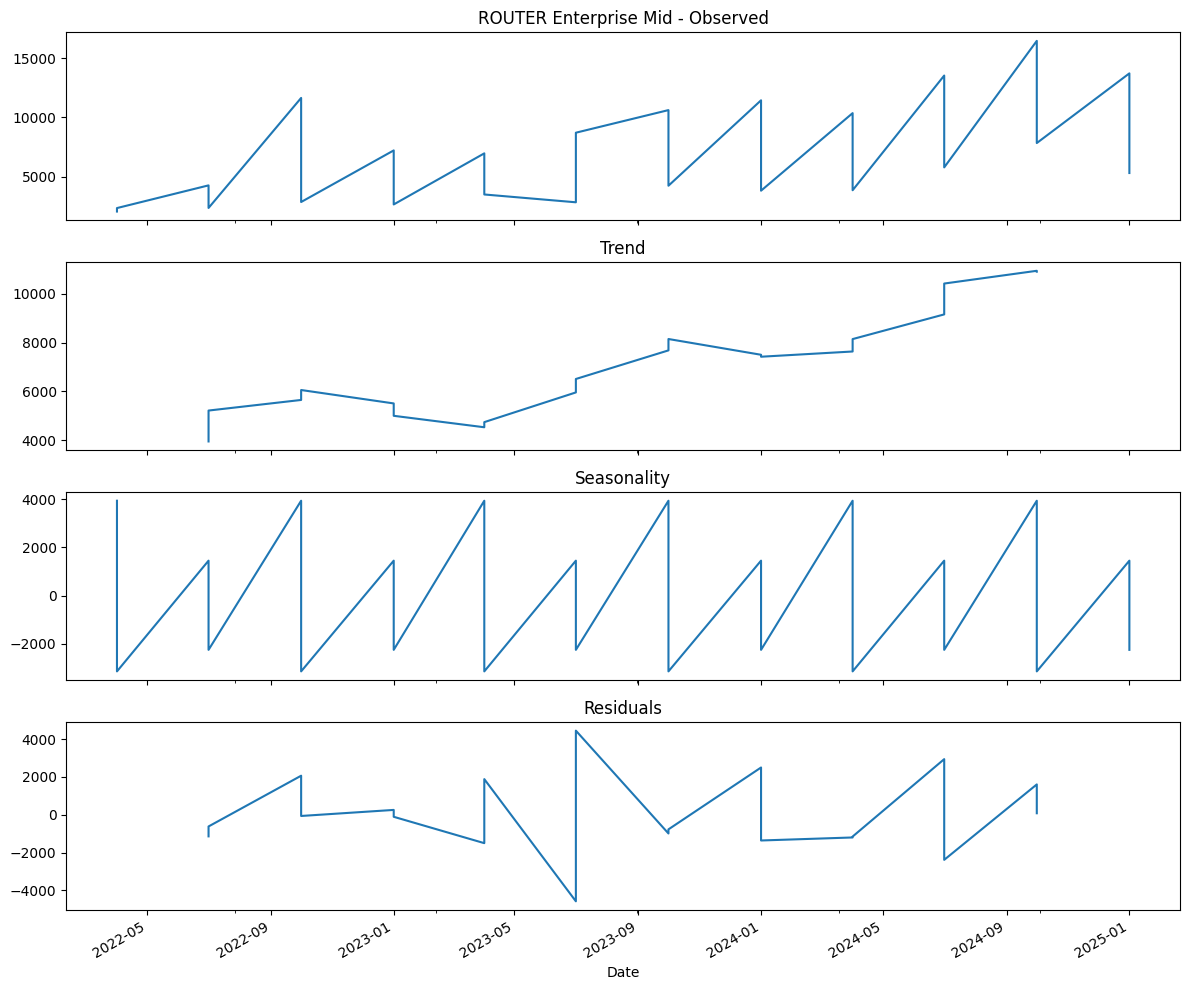

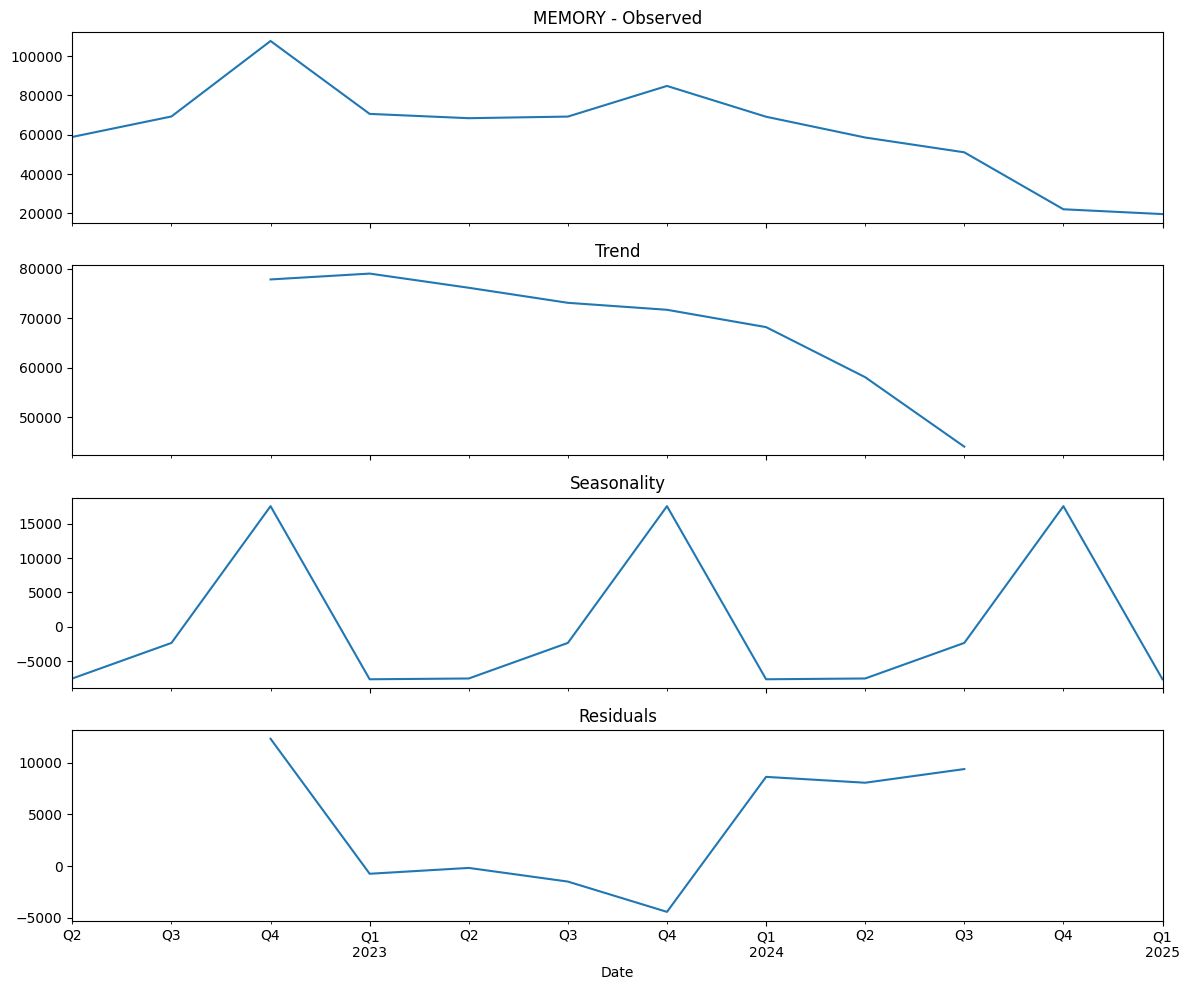

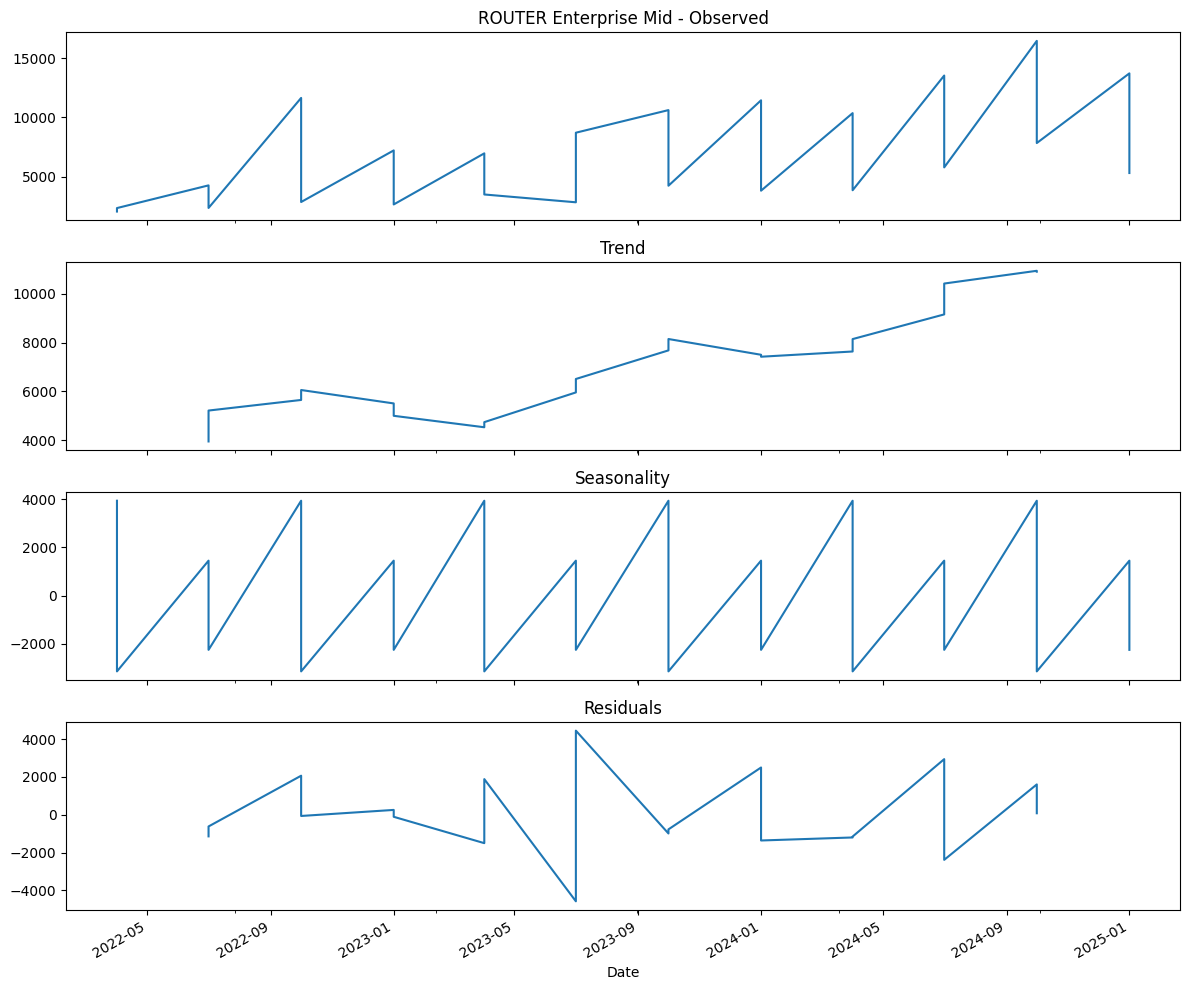

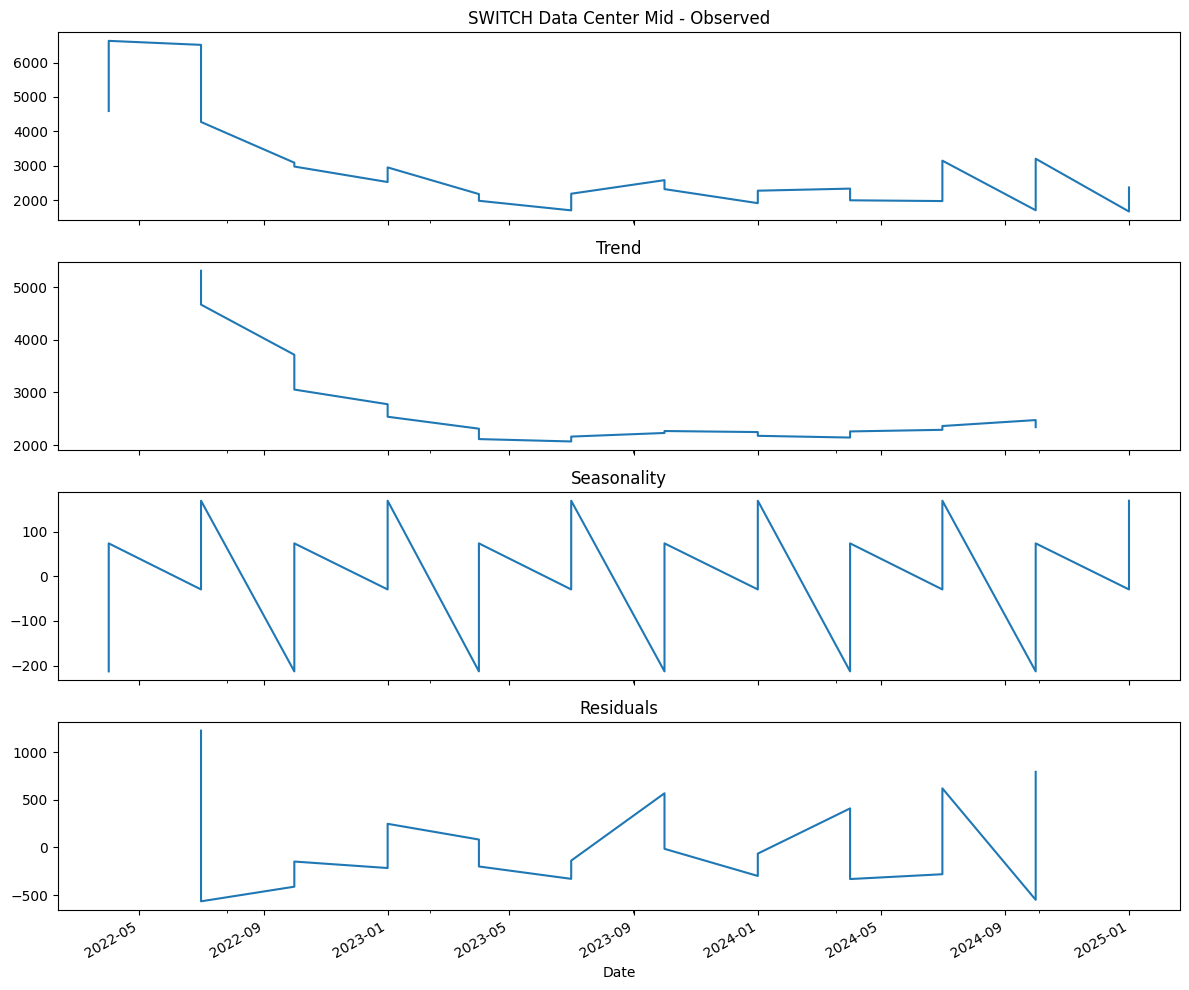

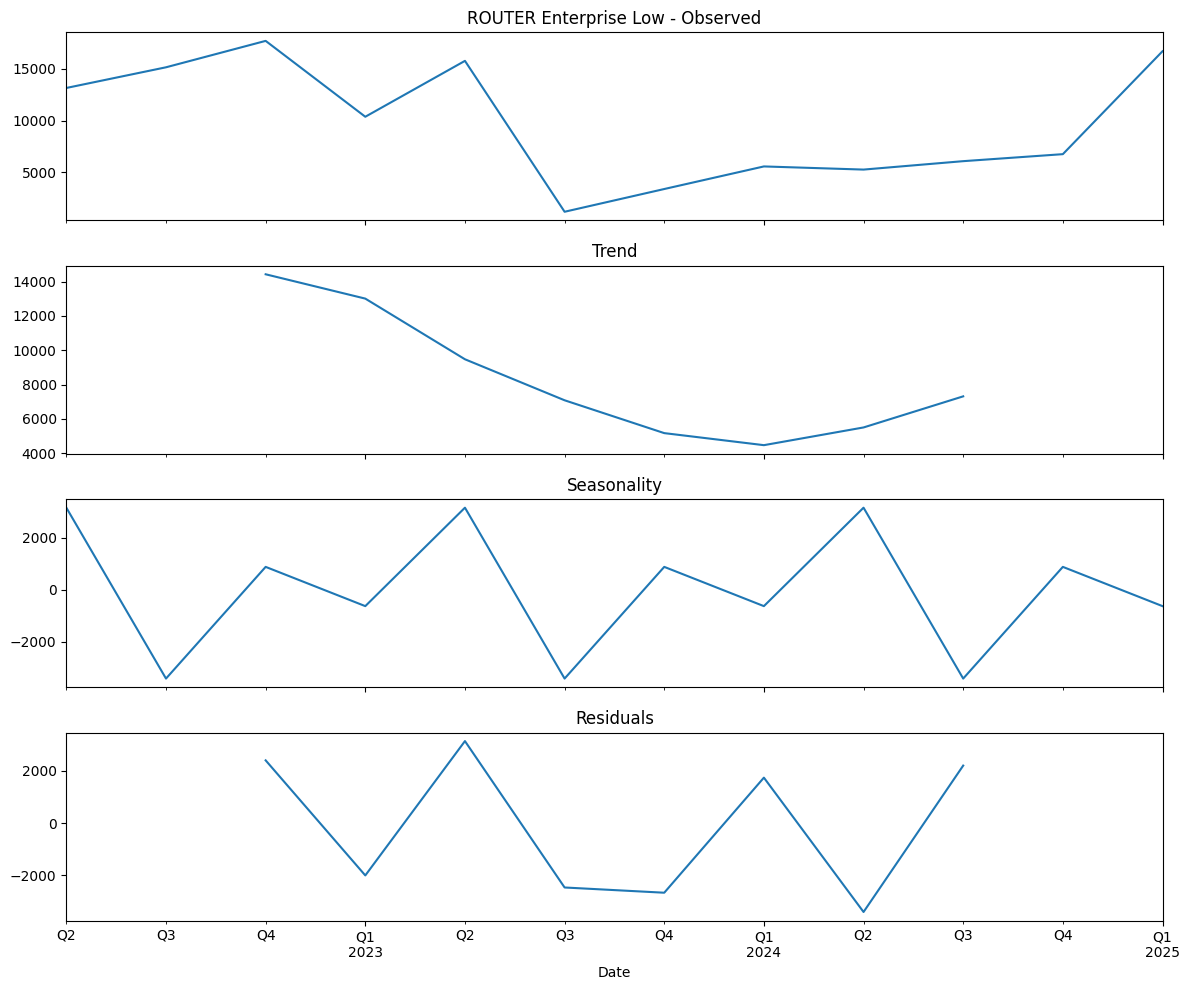

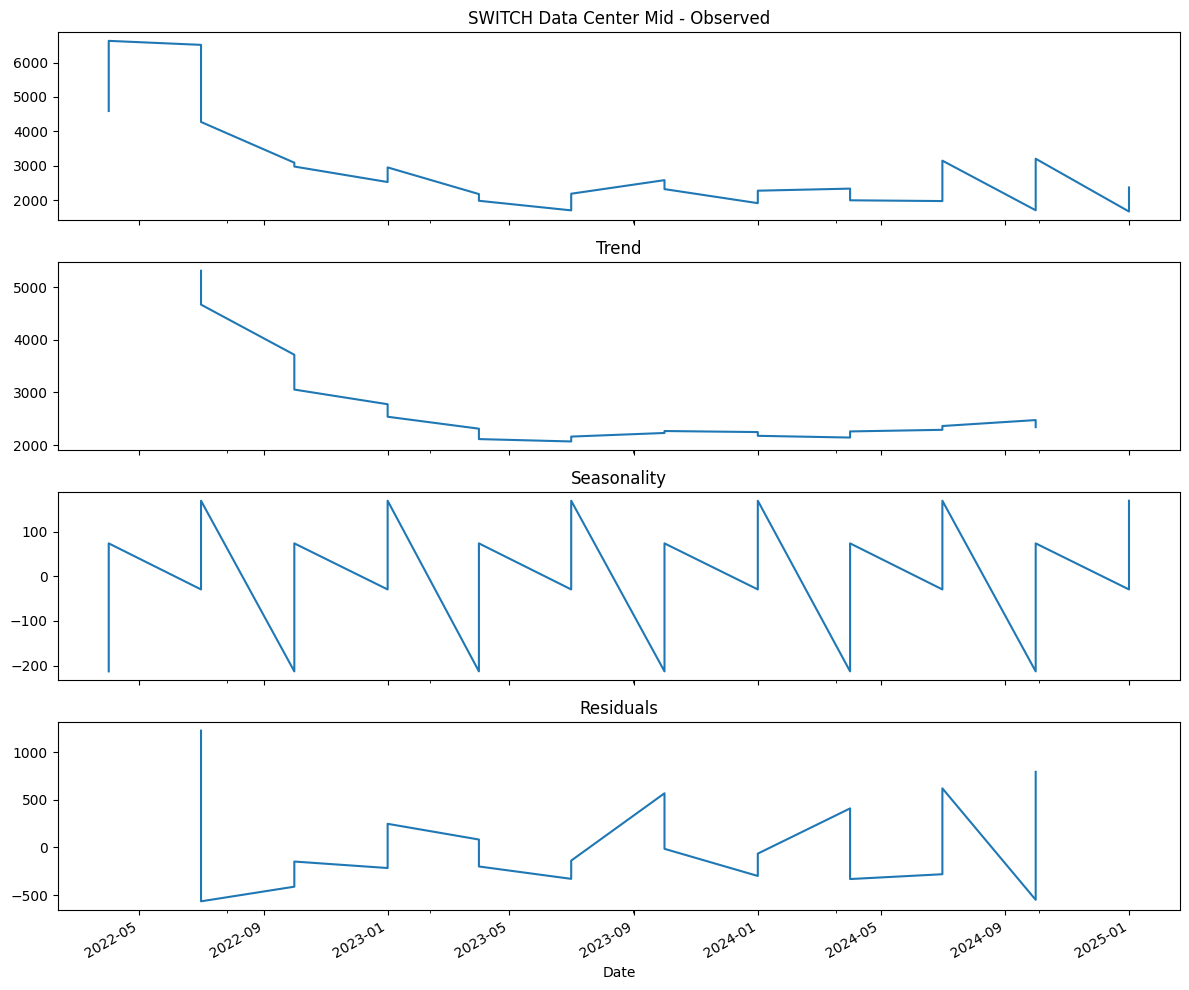

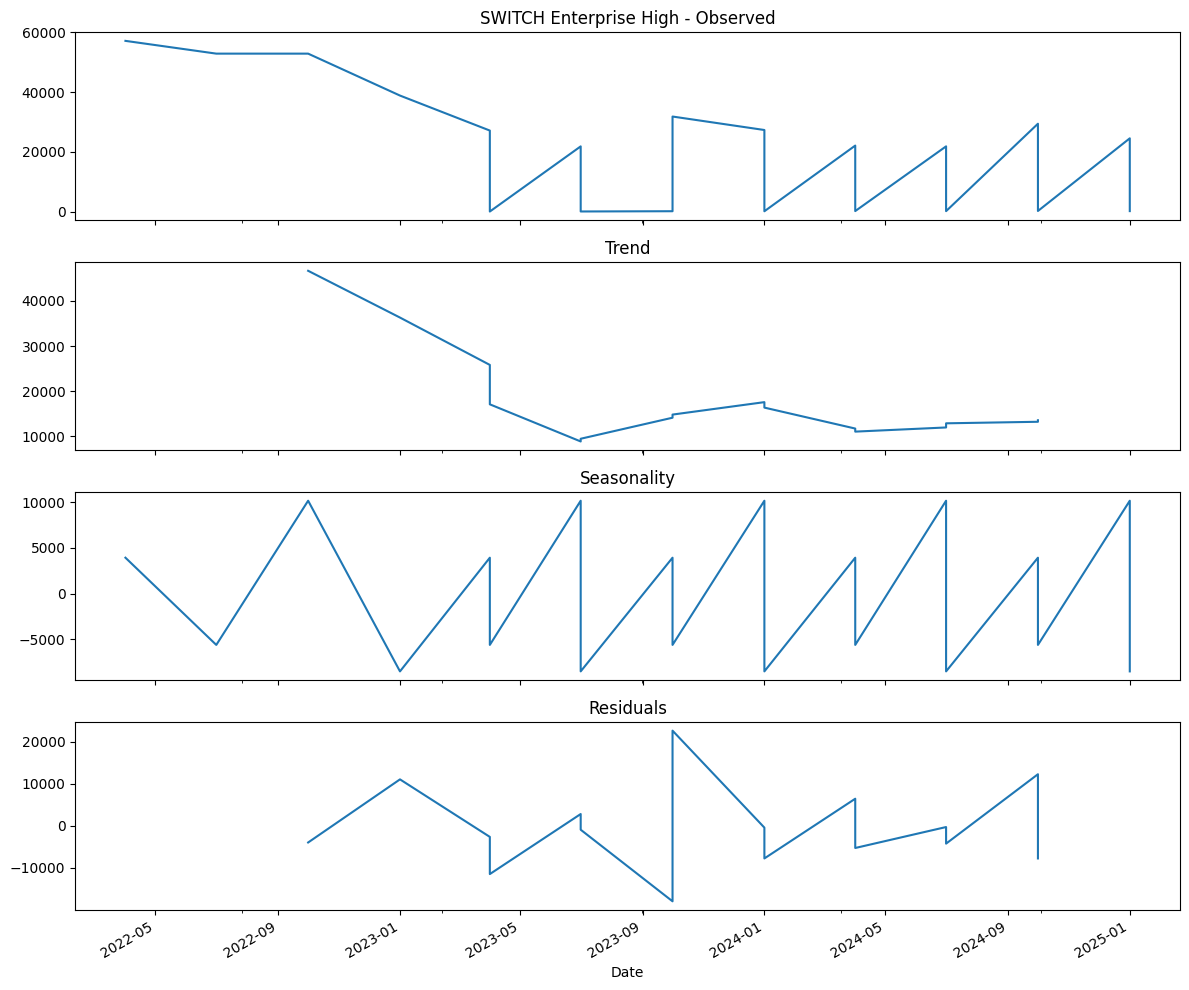

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.nonparametric.smoothers_lowess import lowess
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

# Step 1: Load and prepare the data
# This assumes you've saved the CSV file or converted the data into a DataFrame
def prepare_data(file_path='data_pack.csv'):
    # If using the actual CSV file
    # df = pd.read_csv(file_path)
    
    # For demonstration, I'll manually create the DataFrame from the data
    quarters = ['FY22 Q2', 'FY22 Q3', 'FY22 Q4', 'FY23 Q1', 'FY23 Q2', 'FY23 Q3', 'FY23 Q4', 
                'FY24 Q1', 'FY24 Q2', 'FY24 Q3', 'FY24 Q4', 'FY25 Q1']
    
    data = {
        'Cost Rank': list(range(1, 21)),
        'Product Name': [
            'SWITCH Enterprise High', 'SWITCH Enterprise Ultra High', 'SWITCH Enterprise Ultra High',
            'SWITCH Enterprise Low', 'TRANSCEIVER MODULE Mid', 'POWER SUPPLY High',
            'TRANSCEIVER MODULE High', 'ACCESS POINT Mid', 'POWER SUPPLY Mid', 'SERVER',
            'PROCESSOR', 'SWITCH Data Center High', 'TRANSCEIVER MODULE Mid',
            'ROUTER Enterprise Mid', 'MEMORY', 'ROUTER Enterprise Mid',
            'SWITCH Data Center Mid', 'ROUTER Enterprise Low', 'SWITCH Data Center Mid',
            'SWITCH Enterprise High'
        ],
        'Product Life Cycle': [
            'Sustaining', 'Sustaining', 'Sustaining', 'Sustaining', 'Sustaining',
            'Sustaining', 'Sustaining', 'Sustaining', 'Sustaining', 'Sustaining',
            'Sustaining', 'Sustaining', 'Sustaining', 'Sustaining', 'Decline',
            'Sustaining', 'Sustaining', 'Decline', 'Sustaining', 'NPI'
        ]
    }
    
    # Add quarterly data
    sample_data = [
        [57147, 52873, 52870, 38833, 27114, 21823, 31813, 27302, 22084, 21830, 29404, 24518],
        [222, 1549, 4619, 4764, 5015, 6656, 9605, 5956, 8450, 8584, 12552, 9665],
        [24362, 21308, 19067, 14551, 13271, 10165, 10477, 7295, 8084, 9249, 10742, 9189],
        [0, 0, 1227, 24186, 7680, 16772, 17554, 16095, 26125, 24337, 21988, 32768],
        [208760, 116126, 150803, 82163, 82408, 67132, 87498, 69599, 78130, 76840, 85421, 54494],
        [204604, 194538, 185160, 147284, 136997, 100623, 128229, 100456, 93373, 115327, 145690, 120699],
        [19790, 2476, 3149, 6367, 2287, 11281, 5212, 5408, 11956, 16406, 6735, 29889],
        [0, 0, 13260, 21667, 30498, 40505, 61214, 41932, 59424, 60073, 66952, 57131],
        [191286, 228892, 197489, 138040, 116870, 96797, 117644, 116489, 96255, 97046, 127181, 109609],
        [0, 0, 0, 0, 0, 677, 6834, 4355, 5400, 4422, 6635, 4970],
        [0, 0, 0, 0, 0, 648, 2415, 1331, 1828, 1346, 1175, 1376],
        [1263, 1314, 843, 974, 753, 693, 911, 917, 1944, 1267, 1757, 1472],
        [0, 0, 1688, 531, 6487, 5456, 10031, 10803, 15667, 37379, 34423, 36285],
        [2057, 4266, 11650, 7218, 6969, 8713, 10622, 11449, 10366, 13540, 16468, 13724],
        [58911, 69308, 107690, 70616, 68431, 69252, 84833, 69172, 58610, 51083, 22115, 19674],
        [2349, 2359, 2861, 2655, 3497, 2837, 4237, 3817, 3855, 5784, 7840, 5309],
        [4593, 6513, 3093, 2531, 2182, 2192, 2586, 1918, 2340, 1979, 1712, 1675],
        [13153, 15149, 17700, 10373, 15770, 1199, 3395, 5576, 5272, 6085, 6761, 16697],
        [6629, 4275, 2981, 2956, 1987, 1709, 2326, 2280, 2001, 3152, 3208, 2374],
        [0, 0, 0, 0, 6, 26, 111, 97, 158, 138, 192, 149]
    ]
    
    # Replace empty cells with NaN
    for i, row in enumerate(sample_data):
        for j, val in enumerate(row):
            if val == 0 and i > 9:  # Only treat zeros as missing for certain products
                sample_data[i][j] = np.nan
    
    # Add quarterly data to DataFrame
    for i, quarter in enumerate(quarters):
        data[quarter] = [row[i] if i < len(row) else np.nan for row in sample_data]
    
    # Create DataFrame
    df = pd.DataFrame(data)
    
    # Melt DataFrame for time series analysis
    melted_df = pd.melt(df, 
                        id_vars=['Cost Rank', 'Product Name', 'Product Life Cycle'],
                        value_vars=quarters,
                        var_name='Quarter', 
                        value_name='Demand')
    
    # Create a datetime index for proper time series analysis
    # Extract year and quarter
    melted_df['Year'] = melted_df['Quarter'].str.extract(r'FY(\d{2})').astype(int) + 2000
    melted_df['Q'] = melted_df['Quarter'].str.extract(r'Q(\d)').astype(int)
    
    # Convert to datetime (using first day of each quarter)
    melted_df['Date'] = pd.to_datetime(melted_df.apply(
        lambda x: f"{x['Year']}-{(x['Q']-1)*3 + 1}-01", axis=1
    ))
    
    return df, melted_df

# Step 2: Function for analyzing seasonality with seasonal_decompose
def analyze_seasonality(df_melted, product_name, model='additive', period=4):
    """
    Analyze seasonality for a specific product using statsmodels seasonal_decompose
    
    Parameters:
    -----------
    df_melted : DataFrame
        Melted DataFrame with Date and Demand columns
    product_name : str
        Name of product to analyze
    model : str
        'additive' or 'multiplicative' decomposition
    period : int
        Number of periods in a seasonal cycle (4 for quarterly data)
    """
    # Filter for the product and drop missing values
    product_data = df_melted[df_melted['Product Name'] == product_name].copy()
    product_data = product_data.dropna(subset=['Demand']).sort_values('Date')
    
    # Check if we have enough data for seasonal decomposition
    if len(product_data) < period * 2:
        print(f"Insufficient data for {product_name}. Need at least {period * 2} points, but have {len(product_data)}.")
        return None
    
    # Create time series
    ts = product_data.set_index('Date')['Demand']
    
    # Perform seasonal decomposition
    result = seasonal_decompose(ts, model=model, period=period)
    
    # Plot the decomposition
    fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
    result.observed.plot(ax=axes[0], title=f"{product_name} - Observed")
    result.trend.plot(ax=axes[1], title="Trend")
    result.seasonal.plot(ax=axes[2], title="Seasonality")
    result.resid.plot(ax=axes[3], title="Residuals")
    plt.tight_layout()
    
    # Calculate seasonal indices (average for each quarter)
    if model == 'additive':
        seasonal_indices = result.seasonal.groupby(result.seasonal.index.quarter).mean()
    else:  # multiplicative
        seasonal_indices = result.seasonal.groupby(result.seasonal.index.quarter).mean()
    
    # Calculate seasonal strength
    if model == 'additive':
        seasonal_strength = 1 - (result.resid.var() / (result.seasonal + result.resid).var())
    else:  # multiplicative
        seasonal_strength = 1 - (result.resid.var() / ((result.seasonal - 1) + result.resid).var())
    
    print(f"Seasonal Strength for {product_name}: {seasonal_strength:.4f}")
    print(f"Quarterly Seasonal Indices:")
    for q, idx in enumerate(seasonal_indices, 1):
        print(f"  Q{q}: {idx:.4f}")
    
    return result, seasonal_indices, seasonal_strength

# Step 3: Function to detect outliers
def detect_outliers(df_melted, product_name, threshold=2.5):
    """
    Detect outliers in the product demand data using z-scores
    
    Parameters:
    -----------
    df_melted : DataFrame
        Melted DataFrame with Quarter and Demand columns
    product_name : str
        Name of product to analyze
    threshold : float
        Z-score threshold for outlier detection (default: 2.5)
    """
    # Filter for the product and drop missing values
    product_data = df_melted[df_melted['Product Name'] == product_name].copy()
    product_data = product_data.dropna(subset=['Demand'])
    
    # Calculate z-scores
    product_data['z_score'] = stats.zscore(product_data['Demand'])
    
    # Identify outliers
    outliers = product_data[abs(product_data['z_score']) > threshold]
    
    if len(outliers) > 0:
        print(f"Outliers detected for {product_name}:")
        for _, row in outliers.iterrows():
            print(f"  Quarter: {row['Quarter']}, Demand: {row['Demand']}, Z-score: {row['z_score']:.2f}")
    else:
        print(f"No outliers detected for {product_name} using threshold of {threshold}")
    
    return outliers

# Step 4: Function to analyze autocorrelation for cyclical patterns
def analyze_autocorrelation(df_melted, product_name, lags=12):
    """
    Analyze autocorrelation and partial autocorrelation for cyclical patterns
    
    Parameters:
    -----------
    df_melted : DataFrame
        Melted DataFrame with Date and Demand columns
    product_name : str
        Name of product to analyze
    lags : int
        Number of lags to calculate
    """
    # Filter for the product and drop missing values
    product_data = df_melted[df_melted['Product Name'] == product_name].copy()
    product_data = product_data.dropna(subset=['Demand']).sort_values('Date')
    
    if len(product_data) < lags:
        print(f"Insufficient data for {product_name}. Need at least {lags} points, but have {len(product_data)}.")
        return None
    
    # Create time series
    ts = product_data.set_index('Date')['Demand']
    
    # Calculate ACF and PACF
    acf_values = acf(ts, nlags=lags)
    pacf_values = pacf(ts, nlags=lags)
    
    # Plot ACF and PACF
    fig, axes = plt.subplots(2, 1, figsize=(12, 8))
    plot_acf(ts, lags=lags, ax=axes[0], title=f"{product_name} - Autocorrelation Function")
    plot_pacf(ts, lags=lags, ax=axes[1], title=f"{product_name} - Partial Autocorrelation Function")
    plt.tight_layout()
    
    # Analyze ACF for patterns
    significant_lags = [i for i in range(1, len(acf_values)) if abs(acf_values[i]) > 1.96/np.sqrt(len(ts))]
    
    if significant_lags:
        print(f"Significant autocorrelation lags for {product_name}: {significant_lags}")
        
        # Check for seasonality pattern
        if 4 in significant_lags or 8 in significant_lags:
            print("Evidence of quarterly seasonality found in autocorrelation")
        
        # Check for potential cycle lengths
        if len(significant_lags) > 1:
            cycle_candidates = []
            for i in range(len(significant_lags)-1):
                if significant_lags[i+1] - significant_lags[i] > 1:
                    cycle_candidates.append(significant_lags[i+1] - significant_lags[i])
            
            if cycle_candidates:
                print(f"Potential cycle lengths detected: {cycle_candidates} quarters")
    else:
        print(f"No significant autocorrelation found for {product_name}")
    
    return acf_values, pacf_values

# Step 5: Function to create a seasonality heatmap
def create_seasonality_heatmap(df):
    """
    Create a heatmap showing quarterly patterns across products
    
    Parameters:
    -----------
    df : DataFrame
        Original DataFrame with quarterly data columns
    """
    # Prepare data for heatmap
    quarters = [col for col in df.columns if 'FY' in col]
    
    # Extract quarter number (Q1-Q4) from each column
    quarter_numbers = [col.split(' ')[1] for col in quarters]
    
    # Create matrix for heatmap
    heat_data = []
    products = []
    
    for _, row in df.iterrows():
        product_name = row['Product Name']
        products.append(product_name)
        
        # Convert data to quarter-specific averages
        q_data = {'Q1': [], 'Q2': [], 'Q3': [], 'Q4': []}
        
        for i, q in enumerate(quarters):
            q_num = quarter_numbers[i]
            if not pd.isna(row[q]) and row[q] > 0:  # Skip NaN and 0 values
                q_data[q_num].append(row[q])
        
        # Calculate average for each quarter
        q_avgs = []
        for q in ['Q1', 'Q2', 'Q3', 'Q4']:
            if q_data[q]:
                q_avgs.append(np.mean(q_data[q]))
            else:
                q_avgs.append(np.nan)
        
        # Normalize to show relative quarterly patterns
        if not all(pd.isna(x) for x in q_avgs) and sum(x for x in q_avgs if not pd.isna(x)) > 0:
            q_total = sum(x for x in q_avgs if not pd.isna(x))
            q_avgs = [x/q_total*4 if not pd.isna(x) else np.nan for x in q_avgs]  # Normalize to 4 quarters
        
        heat_data.append(q_avgs)
    
    # Create heatmap
    plt.figure(figsize=(10, 12))
    mask = np.isnan(np.array(heat_data))
    
    ax = sns.heatmap(heat_data, annot=True, fmt=".2f", cmap="YlGnBu", 
                   xticklabels=['Q1', 'Q2', 'Q3', 'Q4'], 
                   yticklabels=products, 
                   mask=mask,
                   cbar_kws={'label': 'Relative Quarterly Demand'})
    
    plt.title('Quarterly Seasonality Patterns by Product')
    plt.tight_layout()
    
    # Identify products with strong seasonal patterns
    seasonal_products = []
    for i, product in enumerate(products):
        if not all(pd.isna(x) for x in heat_data[i]):
            non_nan_values = [x for x in heat_data[i] if not pd.isna(x)]
            if max(non_nan_values) / min(non_nan_values) > 1.2:  # Arbitrary threshold
                max_q = ['Q1', 'Q2', 'Q3', 'Q4'][np.nanargmax(heat_data[i])]
                min_q = ['Q1', 'Q2', 'Q3', 'Q4'][np.nanargmin(heat_data[i])]
                seasonal_products.append((product, max_q, min_q, max(non_nan_values) / min(non_nan_values)))
    
    print("\nProducts with strong seasonal patterns:")
    for product, max_q, min_q, ratio in sorted(seasonal_products, key=lambda x: x[3], reverse=True):
        print(f"  {product}: Peak in {max_q}, Low in {min_q}, Ratio: {ratio:.2f}")
    
    return heat_data, seasonal_products

# Step 6: Function to identify long-term cycles using LOESS
def analyze_long_term_cycles(df_melted, product_name, frac=0.3):
    """
    Analyze long-term cycles using LOESS smoothing
    
    Parameters:
    -----------
    df_melted : DataFrame
        Melted DataFrame with Date and Demand columns
    product_name : str
        Name of product to analyze
    frac : float
        Fraction of data used for LOESS smoothing (0-1)
    """
    # Filter for the product and drop missing values
    product_data = df_melted[df_melted['Product Name'] == product_name].copy()
    product_data = product_data.dropna(subset=['Demand']).sort_values('Date')
    
    if len(product_data) < 8:  # Need sufficient data for trend analysis
        print(f"Insufficient data for {product_name}. Need at least 8 points, but have {len(product_data)}.")
        return None
    
    # Create numeric x-axis (days since first observation)
    product_data['days'] = (product_data['Date'] - product_data['Date'].min()).dt.days
    x = product_data['days'].values
    y = product_data['Demand'].values
    
    # Apply LOESS smoothing
    smoothed = lowess(y, x, frac=frac)
    
    # Plot original and smoothed data
    plt.figure(figsize=(12, 6))
    plt.plot(product_data['Date'], y, 'o-', label='Original Data')
    plt.plot(product_data['Date'], smoothed[:, 1], 'r-', linewidth=3, label='LOESS Trend')
    plt.title(f"{product_name} - Long-term Trend Analysis")
    plt.xlabel('Date')
    plt.ylabel('Demand')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Find peaks and troughs in the smoothed curve
    smoothed_y = smoothed[:, 1]
    peaks = []
    troughs = []
    
    for i in range(1, len(smoothed_y)-1):
        if smoothed_y[i] > smoothed_y[i-1] and smoothed_y[i] > smoothed_y[i+1]:
            peaks.append(i)
        elif smoothed_y[i] < smoothed_y[i-1] and smoothed_y[i] < smoothed_y[i+1]:
            troughs.append(i)
    
    # Mark peaks and troughs
    for p in peaks:
        plt.plot(product_data['Date'].iloc[p], smoothed_y[p], 'g^', markersize=12)
    for t in troughs:
        plt.plot(product_data['Date'].iloc[t], smoothed_y[t], 'rv', markersize=12)
    
    # Analyze cycle lengths if multiple peaks or troughs found
    cycle_lengths = []
    
    if len(peaks) >= 2:
        peak_dates = product_data['Date'].iloc[peaks].tolist()
        for i in range(len(peak_dates)-1):
            days = (peak_dates[i+1] - peak_dates[i]).days
            cycle_lengths.append((days, 'peak-to-peak'))
    
    if len(troughs) >= 2:
        trough_dates = product_data['Date'].iloc[troughs].tolist()
        for i in range(len(trough_dates)-1):
            days = (trough_dates[i+1] - trough_dates[i]).days
            cycle_lengths.append((days, 'trough-to-trough'))
    
    if cycle_lengths:
        print(f"\nCycle Analysis for {product_name}:")
        for days, cycle_type in cycle_lengths:
            quarters = days / 90  # Approximate quarters
            print(f"  {cycle_type.capitalize()} cycle detected: {days} days (~{quarters:.1f} quarters)")
    else:
        if len(peaks) + len(troughs) > 0:
            print(f"\n{product_name}: Insufficient peaks/troughs to determine cycle length")
        else:
            print(f"\n{product_name}: No clear cycles detected")
    
    return smoothed, peaks, troughs, cycle_lengths

# Main execution function
def run_comprehensive_analysis(product_names=None):
    """
    Run comprehensive analysis on selected products
    
    Parameters:
    -----------
    product_names : list or None
        List of product names to analyze. If None, analyze all products
    """
    df, df_melted = prepare_data()
    
    if product_names is None:
        product_names = df['Product Name']
    
    # 1. Analyze seasonality for each product
    print("=" * 80)
    print("SEASONALITY ANALYSIS")
    print("=" * 80)
    for product in product_names:
        print("\n" + "-" * 40)
        print(f"Analyzing seasonality for: {product}")
        analyze_seasonality(df_melted, product)
    
    # 2. Detect outliers
    print("\n" + "=" * 80)
    print("OUTLIER DETECTION")
    print("=" * 80)
    for product in product_names:
        print("\n" + "-" * 40)
        detect_outliers(df_melted, product)
    
    # 3. Analyze autocorrelation for cyclical patterns
    print("\n" + "=" * 80)
    print("AUTOCORRELATION ANALYSIS")
    print("=" * 80)
    for product in product_names:
        print("\n" + "-" * 40)
        print(f"Analyzing autocorrelation for: {product}")
        analyze_autocorrelation(df_melted, product)
    
    # 4. Create seasonality heatmap for all products
    print("\n" + "=" * 80)
    print("SEASONALITY HEATMAP")
    print("=" * 80)
    create_seasonality_heatmap(df)
    
    # 5. Analyze long-term cycles
    print("\n" + "=" * 80)
    print("LONG-TERM CYCLE ANALYSIS")
    print("=" * 80)
    for product in product_names:
        print("\n" + "-" * 40)
        print(f"Analyzing long-term cycles for: {product}")
        analyze_long_term_cycles(df_melted, product)
    
    plt.show()

# Example usage
if __name__ == "__main__":
    # Run analysis for specific products
    products_to_analyze = [
        'POWER SUPPLY High',  # Mature product with potential seasonality
        'MEMORY',             # Product in decline
        'SWITCH Enterprise High',  # Product with NPI variation
        'ROUTER Enterprise Low'    # Product with high volatility
    ]
    
    # run_comprehensive_analysis(products_to_analyze)
    
    # Or run for all products
    run_comprehensive_analysis()